In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score


In [424]:
df = pd.read_csv('C:/Users/alaks/OneDrive/Documents/MLfiles/insurance.csv')

print(df)

      age     sex     bmi  children smoker     region      charges
0      18    male  23.210         0     no  southeast   1121.87390
1      18    male  30.140         0     no  southeast   1131.50660
2      18    male  33.330         0     no  southeast   1135.94070
3      18    male  33.660         0     no  southeast   1136.39940
4      18    male  34.100         0     no  southeast   1137.01100
...   ...     ...     ...       ...    ...        ...          ...
1333   33  female  35.530         0    yes  northwest  55135.40209
1334   31  female  38.095         1    yes  northeast  58571.07448
1335   52    male  34.485         3    yes  northwest  60021.39897
1336   45    male  30.360         0    yes  southeast  62592.87309
1337   54  female  47.410         0    yes  southeast  63770.42801

[1338 rows x 7 columns]


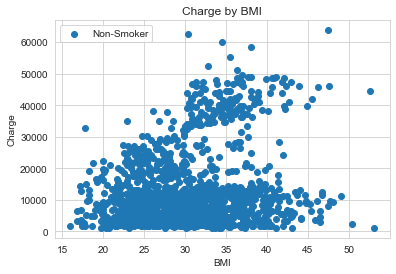

In [425]:

plt.scatter(df['bmi'],df['charges'])
plt.title('Charge by BMI')
plt.xlabel('BMI')
plt.ylabel('Charge')
plt.legend(labels=["Non-Smoker","Smoker"])

<AxesSubplot:xlabel='bmi', ylabel='charges'>

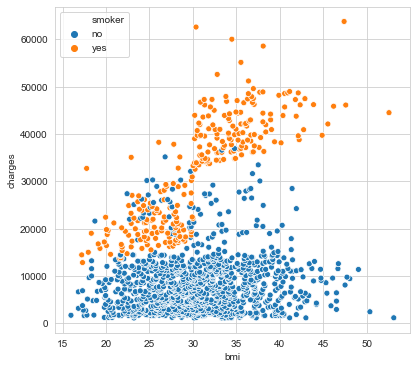

In [426]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(122)
sns.scatterplot(x = 'bmi', y = 'charges', data = df, hue='smoker' )



In [427]:
df.query('bmi > 50 ')['age']

9       18
140     23
1297    22
Name: age, dtype: int64

In [428]:
df.drop(df.query('bmi > 50 ').index ,axis= 0 ,inplace=True)

In [429]:
df.query('bmi > 50 ')['age']

Series([], Name: age, dtype: int64)

In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1335 non-null   int64  
 1   sex       1335 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1335 non-null   int64  
 4   smoker    1335 non-null   object 
 5   region    1335 non-null   object 
 6   charges   1335 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.4+ KB


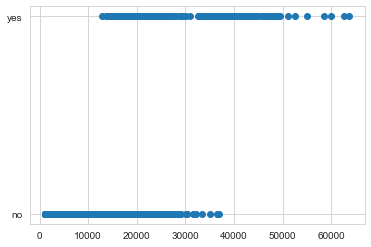

In [431]:
plt.scatter(df['charges'],df['smoker'])

<AxesSubplot:>

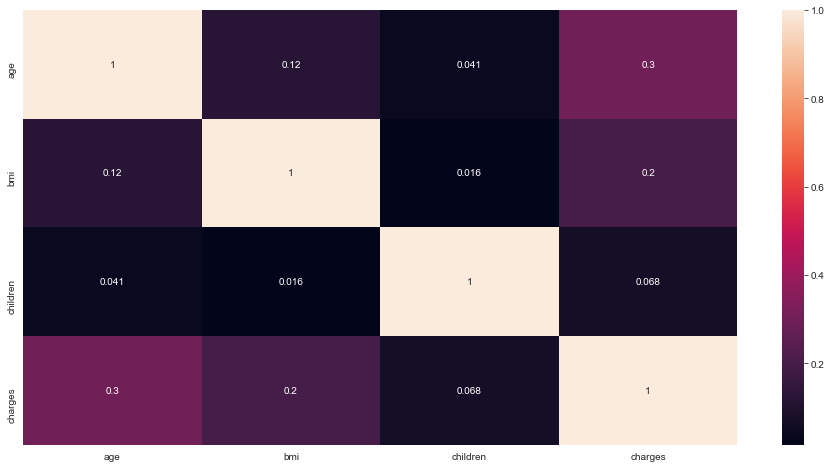

In [432]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr() ,annot=True)

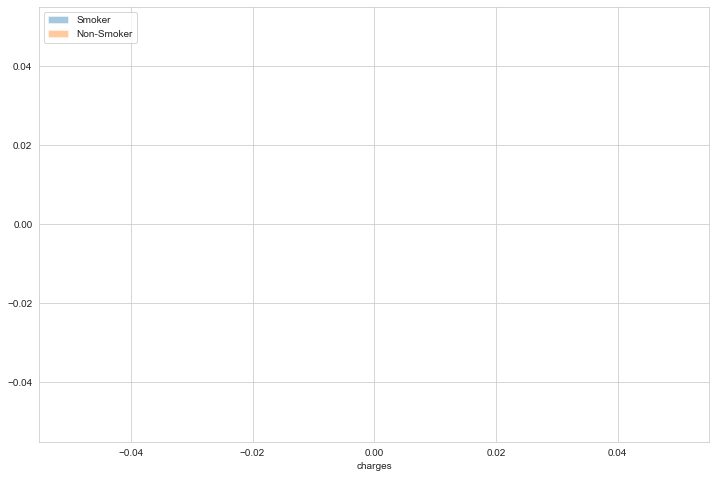

In [433]:

fig= plt.figure(figsize=(12,8))


sns.distplot(df[(df.smoker == 1)]["charges"])


sns.distplot(df[(df.smoker == 0)]['charges'])

plt.legend(labels=["Smoker","Non-Smoker"])

In [434]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
42,19,male,30.59,0,no,northwest,1639.5631


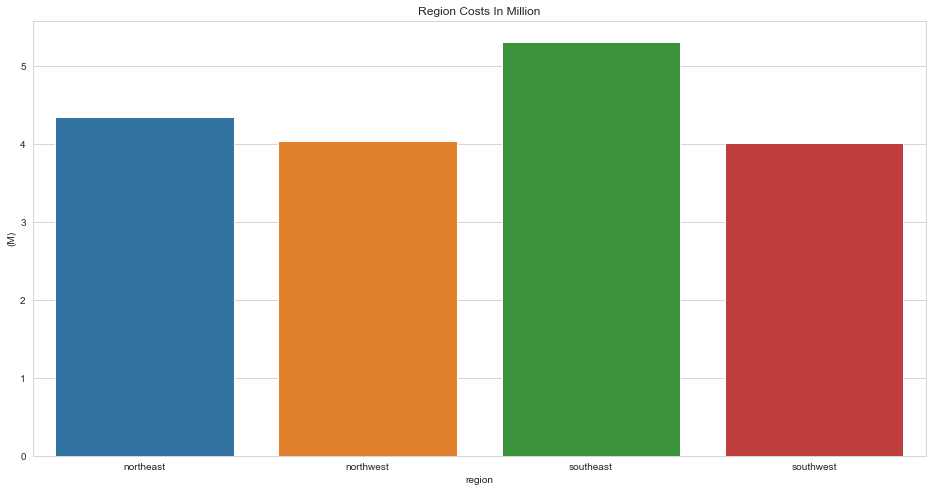

In [435]:
region_cost= df.groupby('region')['charges'].sum() * 1e-6
fig = plt.figure(figsize=(16,8))
sns.barplot(region_cost.index , region_cost.values)
plt.title('Region Costs In Million')
plt.ylabel('(M)')
plt.show()

In [436]:
region = pd.get_dummies(df['region'],drop_first = False)
df = pd.concat([df,region],axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1335 non-null   int64  
 1   sex        1335 non-null   object 
 2   bmi        1335 non-null   float64
 3   children   1335 non-null   int64  
 4   smoker     1335 non-null   object 
 5   region     1335 non-null   object 
 6   charges    1335 non-null   float64
 7   northeast  1335 non-null   uint8  
 8   northwest  1335 non-null   uint8  
 9   southeast  1335 non-null   uint8  
 10  southwest  1335 non-null   uint8  
dtypes: float64(2), int64(2), object(3), uint8(4)
memory usage: 88.7+ KB


In [437]:
smoke = pd.get_dummies(df['smoker'],drop_first = True)
df = pd.concat([df,smoke],axis = 1)

In [438]:
df = df.rename(columns={'yes':'Smoker'})

In [439]:
sex = pd.get_dummies(df['sex'],drop_first = True)
df = pd.concat([df,sex],axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1335 non-null   int64  
 1   sex        1335 non-null   object 
 2   bmi        1335 non-null   float64
 3   children   1335 non-null   int64  
 4   smoker     1335 non-null   object 
 5   region     1335 non-null   object 
 6   charges    1335 non-null   float64
 7   northeast  1335 non-null   uint8  
 8   northwest  1335 non-null   uint8  
 9   southeast  1335 non-null   uint8  
 10  southwest  1335 non-null   uint8  
 11  Smoker     1335 non-null   uint8  
 12  male       1335 non-null   uint8  
dtypes: float64(2), int64(2), object(3), uint8(6)
memory usage: 91.3+ KB


In [440]:
df.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest,Smoker,male
0,18,male,23.21,0,no,southeast,1121.8739,0,0,1,0,0,1
1,18,male,30.14,0,no,southeast,1131.5066,0,0,1,0,0,1
2,18,male,33.33,0,no,southeast,1135.9407,0,0,1,0,0,1
3,18,male,33.66,0,no,southeast,1136.3994,0,0,1,0,0,1
4,18,male,34.10,0,no,southeast,1137.0110,0,0,1,0,0,1


In [441]:
df = df.drop(['sex','smoker','region'], axis = 1)
df.head()

,age,bmi,children,charges,northeast,northwest,southeast,southwest,Smoker,male
0,18,23.21,0,1121.8739,0,0,1,0,0,1
1,18,30.14,0,1131.5066,0,0,1,0,0,1
2,18,33.33,0,1135.9407,0,0,1,0,0,1
3,18,33.66,0,1136.3994,0,0,1,0,0,1
4,18,34.10,0,1137.0110,0,0,1,0,0,1


<AxesSubplot:>

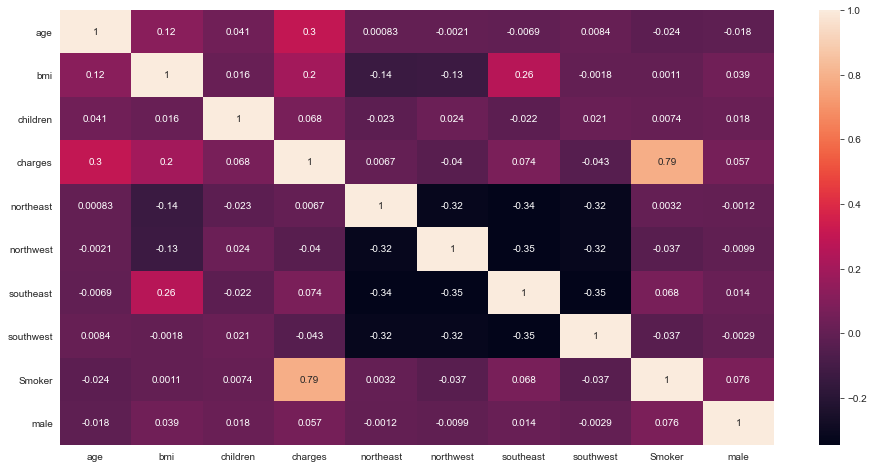

In [442]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr() ,annot=True)

In [443]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = df.drop(['charges'],axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
l_g = LinearRegression()
l_g.fit(X_train, y_train)

print(l_g.intercept_)

-12559.746350164078


In [444]:
coeffecients = pd.DataFrame(l_g.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
age,257.331216
bmi,341.311410
children,460.182118
northeast,611.795509
northwest,205.614426
southeast,-236.344706
southwest,-581.065228
Smoker,23750.790592
male,-17.431917


In [445]:
predictions = l_g.predict(X_test)

R-squared score for Multi-Linear Regression on the test data: 0.7507808039817865


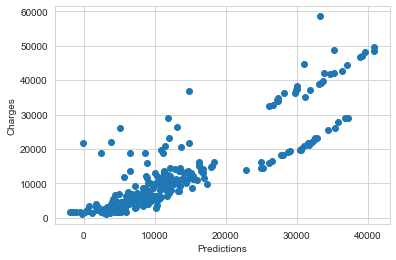

In [446]:
from sklearn import metrics
from sklearn.metrics import r2_score


plt.scatter(predictions,y_test)
plt.ylabel('Charges')
plt.xlabel('Predictions')


print('R-squared score for Multi-Linear Regression on the test data: {}'.format(r2_score(y_test, predictions), 2))

